# Módulo 10 atividade 1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('previsao_de_renda.csv')
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

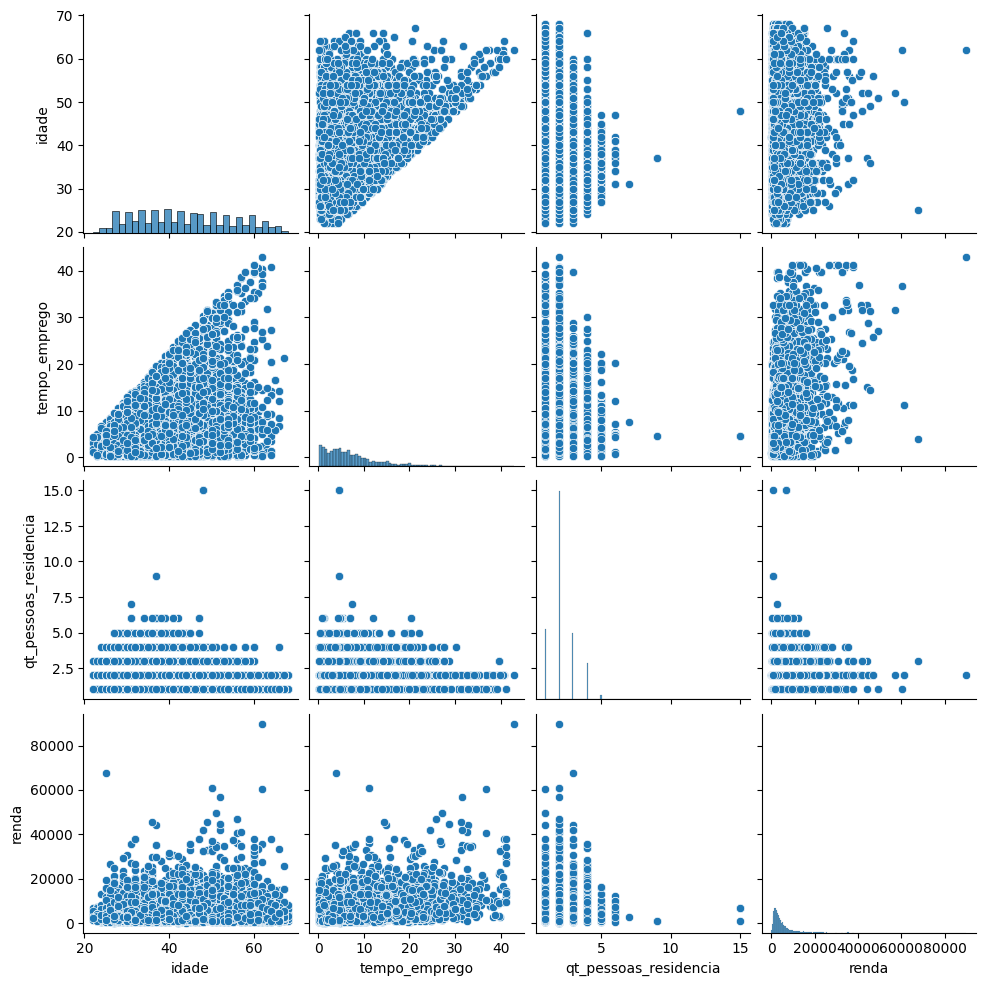

In [ ]:
# 1) variáveis quantitativas
quantitativa = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

# 1.2) Matriz de Dispersão
sns.pairplot(df[quantitativa])
plt.show()


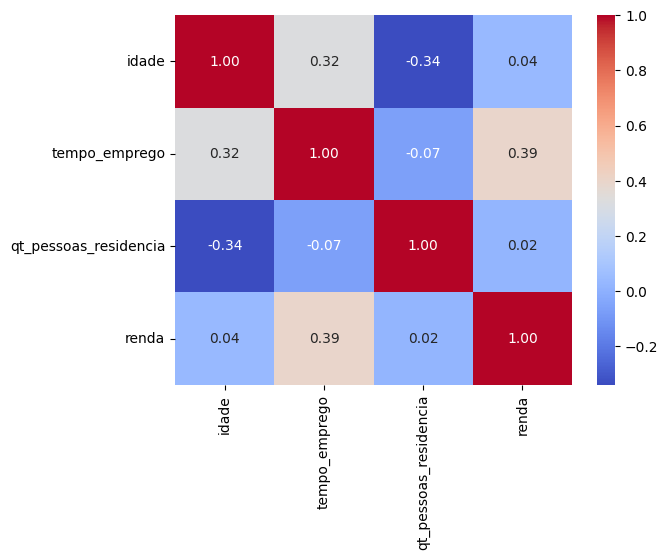

In [ ]:
# 1.3) Matriz de Correlação
corr_matrix = df[quantitativa].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Variáveis mais correlacionadas com renda: Index(['tempo_emprego', 'idade'], dtype='object')


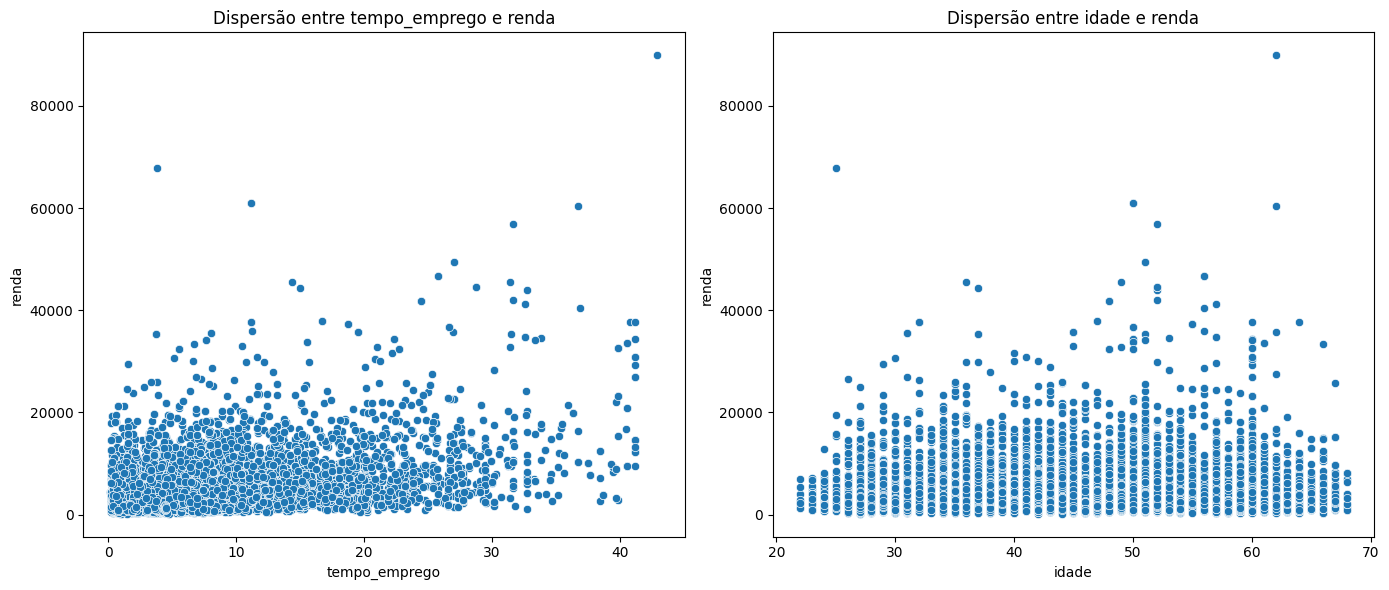

In [ ]:
# 2) Scatterplot
corr_renda = corr_matrix['renda'].drop('renda')
var_relacionada = corr_renda.abs().sort_values(ascending=False).index[:2]

print("Variáveis mais correlacionadas com renda:", var_relacionada)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, var in enumerate(var_relacionada):
    sns.scatterplot(x=var, y='renda', data=df, ax=axes[i])
    axes[i].set_title(f'Dispersão entre {var} e renda')

plt.tight_layout()
plt.show()

3) Na sua aopinião, há outliers na variável renda?

**Sim, como podemos ver existem alguns pontos muito fora da curva.**




*   tempo_emprego x renda
1.  maior outlier: x = 40, y = +80000
*   idade x renda
1. maior outlier: x = 60, y = +80000




4) Calcule o logaritmo da variável renda e repita a sequência de análise

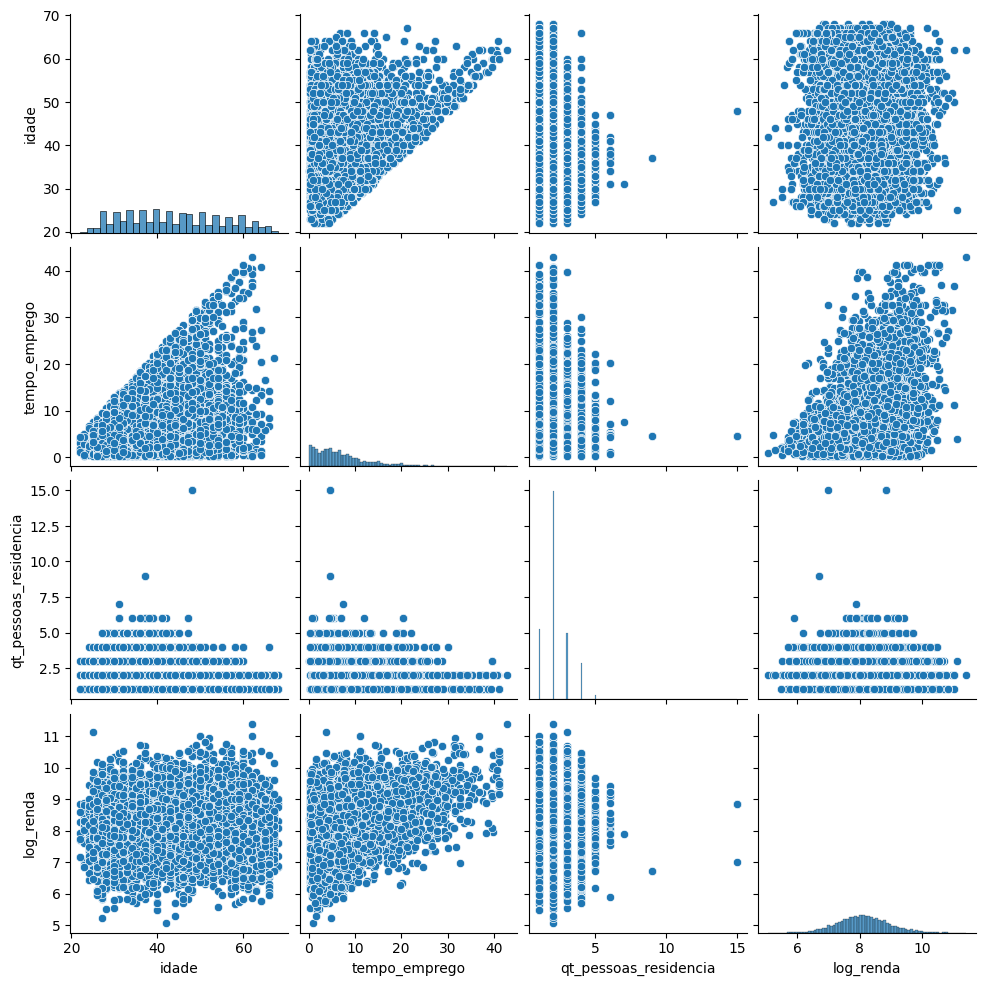

In [ ]:
# 4.1) log
df['log_renda'] = np.log(df['renda'])
log_quantitativa = ['idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']

# 4.2) dispersão
sns.pairplot(df[log_quantitativa])
plt.show()


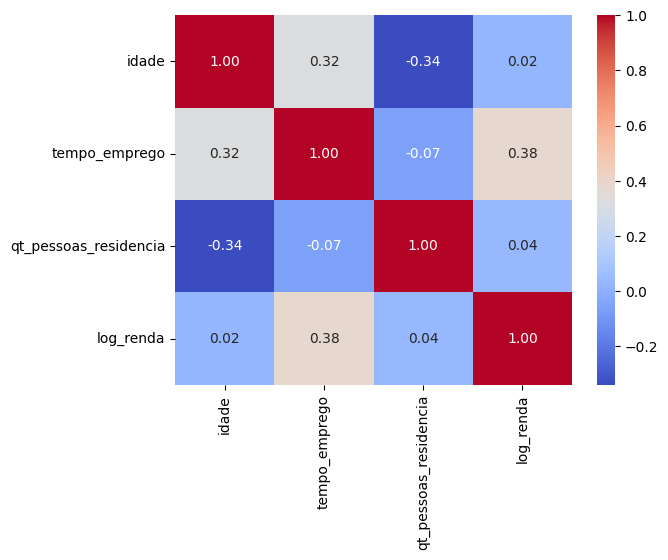

In [ ]:
# 4.3) correlação
corr_matrix = df[log_quantitativa].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Variáveis mais correlacionadas com renda: Index(['tempo_emprego', 'qt_pessoas_residencia'], dtype='object')


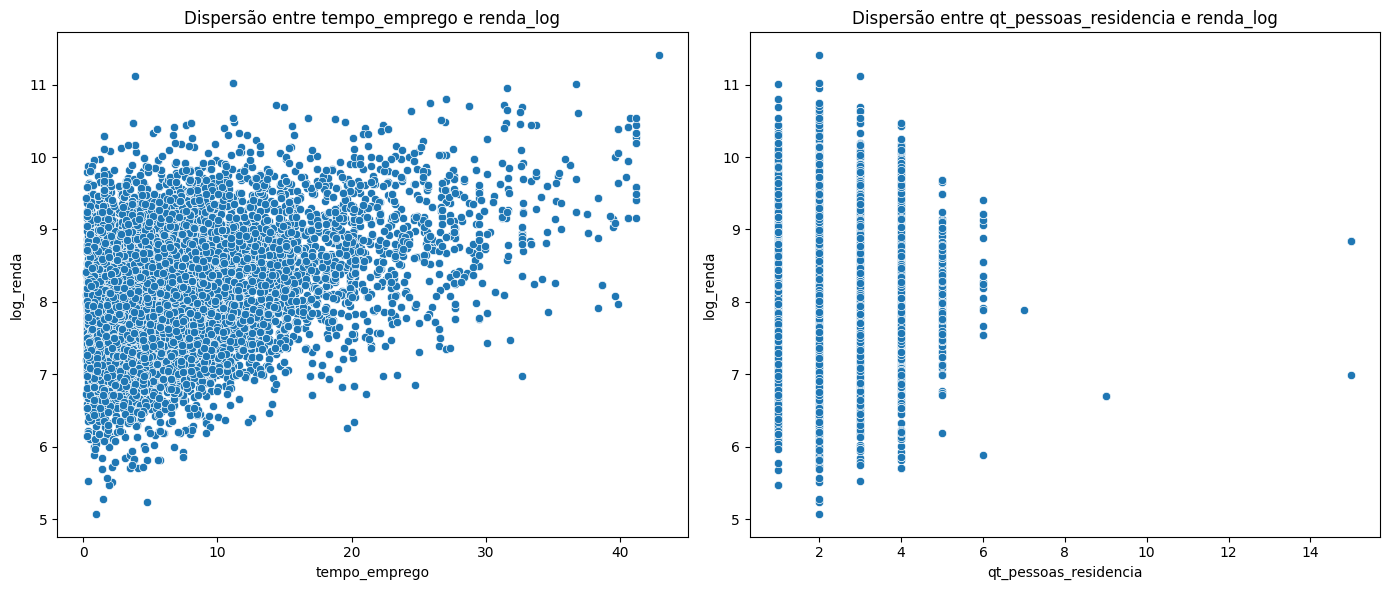

In [ ]:
# 4.4) Criar gráfico de dispersão para as duas variáveis mais correlacionadas com renda_log

corr_renda_log = corr_matrix['log_renda'].drop('log_renda')
relacionada_log = corr_renda_log.abs().sort_values(ascending=False).index[:2]

print("Variáveis mais correlacionadas com renda:", relacionada_log)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, var in enumerate(relacionada_log):
    sns.scatterplot(x=var, y='log_renda', data=df, ax=axes[i])
    axes[i].set_title(f'Dispersão entre {var} e renda_log')

plt.tight_layout()
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Algumas variaveis como *tempo_emprego* ficaram organizadas e mantiveram um numero de correlação similar. agora variaveis como *idade* e *qt_pessoas_residencia* tiveram uma leve redução em sua correlação.
